In [11]:
from autopreps.autoprep import AutoPrep
import seaborn as sns

# Carga el conjunto de datos de ejemplo
df = sns.load_dataset('iris')
dp = AutoPrep(df)

In [12]:
missing_analysis = dp.analyze_missing()
missing_analysis

Total Missing Values:
No missings in the dataset.


Columns with Missing Values:
No missing values in any column.


Missing Values Ratio:
sepal_length: 0.00 missing ratio
sepal_width: 0.00 missing ratio
petal_length: 0.00 missing ratio
petal_width: 0.00 missing ratio
species: 0.00 missing ratio


No columns were dropped based on missing value threshold.


{}

In [13]:
  # Asegúrate de que AutoPrep esté importado correctamente
import numpy as np
# Cargar el dataset iris
df = sns.load_dataset('iris')

# Crear una nueva columna con valores faltantes (NaN)
df['new_column'] = np.nan

# Introducir valores faltantes en algunas filas de la nueva columna (por ejemplo, 10% de los datos)
nan_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
df.loc[nan_indices, 'new_column'] = np.nan

# Verificar que la columna tiene valores faltantes
print(df.isnull().sum())  # Ver cuántos valores faltan en cada columna

# Crear el objeto AutoPrep
dp = AutoPrep(df)

# Probar la función analyze_missing
missing_stats = dp.analyze_missing(threshold=0.9, impute_strategy="mean")



sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species           0
new_column      150
dtype: int64
Total Missing Values:
sepal_length: 0 missing  |  sepal_width: 0 missing  |  petal_length: 0 missing  |  petal_width: 0 missing  |  species: 0 missing  |  new_column: 150 missing  |  

Columns with Missing Values:
new_column: 150 missing


Missing Values Ratio:
sepal_length: 0.00 missing ratio
sepal_width: 0.00 missing ratio
petal_length: 0.00 missing ratio
petal_width: 0.00 missing ratio
species: 0.00 missing ratio
new_column: 1.00 missing ratio


Dropped Columns (more than 90.0% missing): ['new_column']


In [14]:
outliers = dp.handle_outliers()
outliers

{'sepal_length': 0, 'sepal_width': 1, 'petal_length': 0, 'petal_width': 0}

In [15]:
# Estadísticas básicas
basic_stats = dp.get_basic_stats()
print("Basic Stats:")
basic_stats

Basic Stats:


{'sepal_length': 'skewness: 0.31, std: 0.83, mean: 5.84, median: 5.8, min: 4.3, max: 7.9',
 'sepal_width': 'skewness: 0.32, std: 0.44, mean: 3.06, median: 3.0, min: 2.0, max: 4.4',
 'petal_length': 'skewness: -0.27, std: 1.77, mean: 3.76, median: 4.35, min: 1.0, max: 6.9',
 'petal_width': 'skewness: -0.1, std: 0.76, mean: 1.2, median: 1.3, min: 0.1, max: 2.5'}

In [16]:
# Prueba de normalidad
normality_results = dp.normality_test()
normality_results

{'sepal_length': {'skewness': 0.3149109566369728,
  'kurtosis': -0.5520640413156395,
  'is_normal': True},
 'sepal_width': {'skewness': 0.31896566471359966,
  'kurtosis': 0.2282490424681929,
  'is_normal': True},
 'petal_length': {'skewness': -0.27488417975101276,
  'kurtosis': -1.4021034155217518,
  'is_normal': True},
 'petal_width': {'skewness': -0.10296674764898116,
  'kurtosis': -1.340603996612646,
  'is_normal': True}}

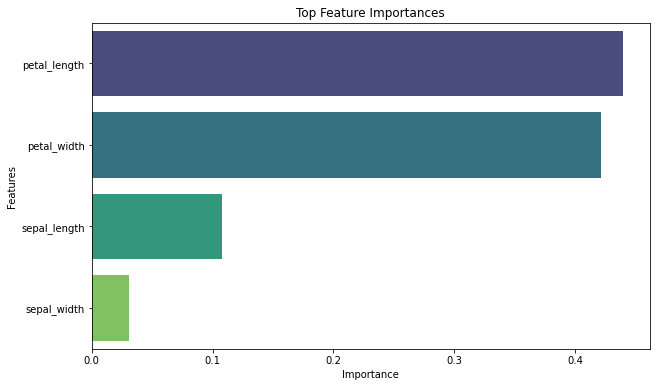

In [17]:
# Importancia de características
dp.simple_feature_importance(target='species', top_n=5)

In [18]:
# Ejecución de modelos
model_results = dp.run_models(target='sepal_width')
print("Model Results:", model_results)

Model Results: {'RandomForestRegressor MSE': 0.1496685819393417, 'LinearRegression MSE': 0.08853623773910664}


In [19]:
# Selección de características con RFE
selected_features_rfe = dp.select_features(target='species', k = 2)
print("Selected Features (RFE):", selected_features_rfe)

# Selección de características basada en la importancia
selected_features_importance = dp.select_features(method='importance', target='species', k=3)
print("Selected Features (Importance):", selected_features_importance)

# Selección de características con SelectKBest
selected_features_kbest = dp.select_features(method='selectkbest', target='species', k=3)
print("Selected Features (SelectKBest):", selected_features_kbest)

Selected Features (RFE): Index(['petal_length', 'petal_width'], dtype='object')
Selected Features (Importance): Index(['petal_length', 'petal_width', 'sepal_length'], dtype='object')
Selected Features (SelectKBest): Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')


Total Missing Values:
No missings in the dataset.


Columns with Missing Values:
No missing values in any column.


Missing Values Ratio:
sepal_length: 0.00 missing ratio
sepal_width: 0.00 missing ratio
petal_length: 0.00 missing ratio
petal_width: 0.00 missing ratio
species: 0.00 missing ratio


No columns were dropped based on missing value threshold.


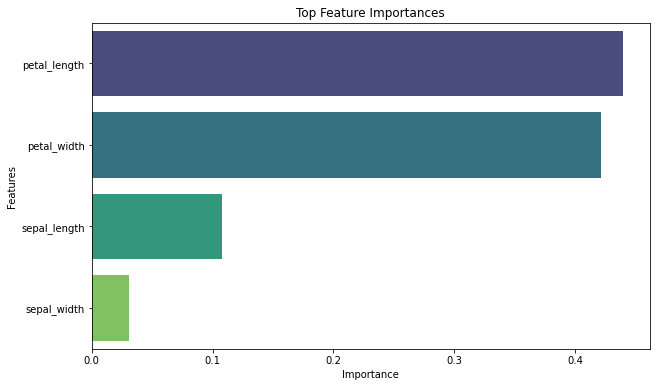

{'missing_analysis': {},
 'outliers_analysis': {'sepal_length': 0,
  'sepal_width': 1,
  'petal_length': 0,
  'petal_width': 0},
 'basic_stats': {'sepal_length': 'skewness: 0.31, std: 0.83, mean: 5.84, median: 5.8, min: 4.3, max: 7.9',
  'sepal_width': 'skewness: 0.32, std: 0.44, mean: 3.06, median: 3.0, min: 2.0, max: 4.4',
  'petal_length': 'skewness: -0.27, std: 1.77, mean: 3.76, median: 4.35, min: 1.0, max: 6.9',
  'petal_width': 'skewness: -0.1, std: 0.76, mean: 1.2, median: 1.3, min: 0.1, max: 2.5'},
 'normality_tests': {'sepal_length': {'skewness': 0.3149109566369728,
   'kurtosis': -0.5520640413156395,
   'is_normal': True},
  'sepal_width': {'skewness': 0.31896566471359966,
   'kurtosis': 0.2282490424681929,
   'is_normal': True},
  'petal_length': {'skewness': -0.27488417975101276,
   'kurtosis': -1.4021034155217518,
   'is_normal': True},
  'petal_width': {'skewness': -0.10296674764898116,
   'kurtosis': -1.340603996612646,
   'is_normal': True}},
 'select_features': Index([

In [20]:
normality_results = dp.run_full_analysis(target='species')
normality_results